## In this notebook, I will classify images of nine different categories relating to fashion.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fashion-mnist_train.csv")

In [3]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


### Labels

### Each training and test example is assigned to one of the following labels:

#### 0 T-shirt/top
#### 1 Trouser
#### 2 Pullover
#### 3 Dress
#### 4 Coat
#### 5 Sandal
#### 6 Shirt
#### 7 Sneaker
#### 8 Bag
#### 9 Ankle boot

In [5]:
file = 't10k-images-idx3-ubyte'

In [9]:
%pip install idx2numpy
import idx2numpy

In [10]:
array = idx2numpy.convert_from_file(file)

### let's take a look at an example from the dataset:

In [11]:
print(array[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

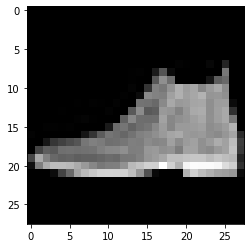

In [12]:
plt.imshow(array[0], cmap = 'gray')
plt.show()

## Split to Training and Testing

In [16]:
from sklearn.model_selection import train_test_split
x = df.drop(['label'],axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Scaling

In [17]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model - Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1189
           1       0.94      0.94      0.94      1189
           2       0.67      0.67      0.67      1204
           3       0.81      0.79      0.80      1260
           4       0.66      0.67      0.66      1208
           5       0.90      0.89      0.90      1188
           6       0.54      0.55      0.55      1195
           7       0.86      0.87      0.87      1160
           8       0.91      0.90      0.91      1210
           9       0.89      0.90      0.90      1197

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79     12000
weighted avg       0.79      0.79      0.79     12000

Accuracy:  0.79375


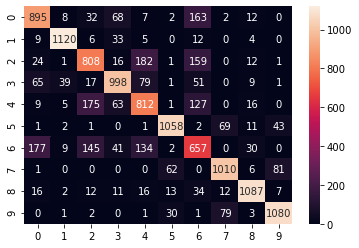

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confmat = confusion_matrix(y_test, y_pred1)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, y_pred1)
acc_score1 = accuracy_score(y_test, y_pred1)
print(class_rep1)
print("Accuracy: ", acc_score1)

## Model - Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(x_train, y_train)
y_pred2 = lg.predict(x_test)

C:\Users\yaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy Check

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1189
           1       0.97      0.97      0.97      1189
           2       0.73      0.78      0.75      1204
           3       0.86      0.87      0.87      1260
           4       0.76      0.77      0.76      1208
           5       0.94      0.94      0.94      1188
           6       0.63      0.57      0.60      1195
           7       0.91      0.93      0.92      1160
           8       0.94      0.94      0.94      1210
           9       0.94      0.94      0.94      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy:  0.8503333333333334


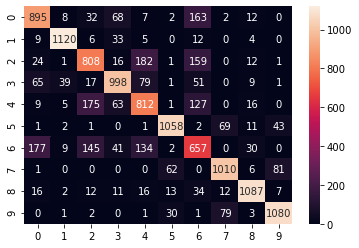

In [22]:
confmat2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep2 = classification_report(y_test, y_pred2)
acc_score2 = accuracy_score(y_test, y_pred2)
print(class_rep2)
print("Accuracy: ", acc_score2)

## Model - Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred3 = rf.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1189
           1       1.00      0.96      0.98      1189
           2       0.77      0.82      0.80      1204
           3       0.89      0.92      0.90      1260
           4       0.78      0.83      0.80      1208
           5       0.96      0.96      0.96      1188
           6       0.75      0.59      0.66      1195
           7       0.93      0.94      0.94      1160
           8       0.95      0.96      0.96      1210
           9       0.95      0.95      0.95      1197

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Accuracy:  0.8811666666666667


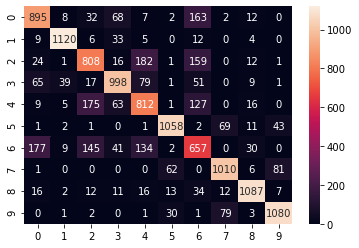

In [25]:
confmat3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep3 = classification_report(y_test, y_pred3)
acc_score3 = accuracy_score(y_test, y_pred3)
print(class_rep3)
print("Accuracy: ", acc_score3)

## AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred4 = ada.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1189
           1       0.80      0.08      0.14      1189
           2       0.22      0.76      0.35      1204
           3       0.37      0.48      0.42      1260
           4       0.35      0.28      0.31      1208
           5       0.62      0.70      0.66      1188
           6       0.24      0.04      0.07      1195
           7       0.52      0.70      0.59      1160
           8       0.70      0.87      0.77      1210
           9       0.93      0.48      0.64      1197

    accuracy                           0.44     12000
   macro avg       0.48      0.44      0.40     12000
weighted avg       0.48      0.44      0.40     12000

Accuracy:  0.43933333333333335


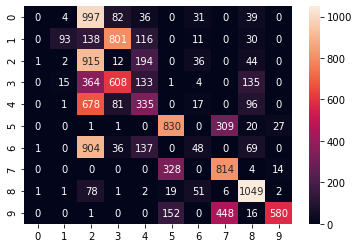

In [27]:
confmat4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(confmat4, annot = True, fmt = "d")
class_rep4 = classification_report(y_test, y_pred4)
acc_score4 = accuracy_score(y_test, y_pred4)
print(class_rep4)
print("Accuracy: ", acc_score4)

## XGBoost

In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred5 = xgb.predict(x_test)

C:\Users\yaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Accuracy Check

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1189
           1       0.99      0.97      0.98      1189
           2       0.82      0.85      0.83      1204
           3       0.90      0.90      0.90      1260
           4       0.82      0.85      0.84      1208
           5       0.98      0.97      0.97      1188
           6       0.74      0.67      0.71      1195
           7       0.94      0.95      0.95      1160
           8       0.97      0.97      0.97      1210
           9       0.96      0.96      0.96      1197

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy:  0.8959166666666667


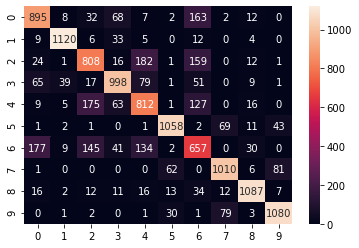

In [29]:
confmat5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep5 = classification_report(y_test, y_pred5)
acc_score5 = accuracy_score(y_test, y_pred5)
print(class_rep5)
print("Accuracy: ", acc_score5)

## Dimensionality Reduction - PCA

In [30]:
from sklearn.decomposition import PCA
pca_784 = PCA(n_components=784)
pca_784.fit(df)

PCA(n_components=784)

Text(0, 0.5, 'Explained variance')

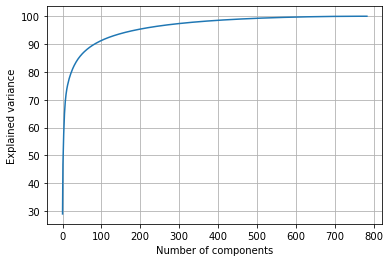

In [31]:
plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [32]:
pca_550 = PCA(n_components=550)
x_reduced = pca_550.fit_transform(x)
x_recovered = pca_550.inverse_transform(x_reduced)

In [34]:
np.cumsum(pca_550.explained_variance_ratio_)[-1]

0.9950048089488073

In [36]:
x_reduced_train, x_reduced_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=0)

In [37]:
dt.fit(x_reduced_train, y_train)
y_pred6 = dt.predict(x_reduced_test)
lg.fit(x_reduced_train, y_train)
y_pred7 = lg.predict(x_reduced_test)
rf.fit(x_reduced_train, y_train)
y_pred8 = rf.predict(x_reduced_test)
ada.fit(x_reduced_train, y_train)
y_pred9 = ada.predict(x_reduced_test)
xgb.fit(x_reduced_train, y_train)
y_pred10 = xgb.predict(x_reduced_test)

C:\Users\yaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1189
           1       0.93      0.92      0.92      1189
           2       0.62      0.66      0.64      1204
           3       0.78      0.76      0.77      1260
           4       0.60      0.58      0.59      1208
           5       0.83      0.81      0.82      1188
           6       0.48      0.47      0.48      1195
           7       0.82      0.83      0.83      1160
           8       0.86      0.84      0.85      1210
           9       0.86      0.87      0.86      1197

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000

Accuracy:  0.74575


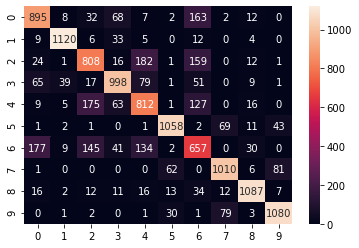

In [38]:
confmat6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep6 = classification_report(y_test, y_pred6)
acc_score6 = accuracy_score(y_test, y_pred6)
print(class_rep6)
print("Accuracy: ", acc_score6)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1189
           1       0.98      0.97      0.97      1189
           2       0.73      0.77      0.75      1204
           3       0.86      0.87      0.86      1260
           4       0.76      0.76      0.76      1208
           5       0.93      0.93      0.93      1188
           6       0.63      0.57      0.60      1195
           7       0.91      0.92      0.92      1160
           8       0.95      0.94      0.94      1210
           9       0.94      0.94      0.94      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy:  0.8485


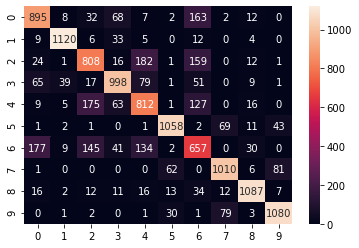

In [39]:
confmat7 = confusion_matrix(y_test, y_pred7)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep7 = classification_report(y_test, y_pred7)
acc_score7 = accuracy_score(y_test, y_pred7)
print(class_rep7)
print("Accuracy: ", acc_score7)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1189
           1       1.00      0.94      0.97      1189
           2       0.75      0.81      0.78      1204
           3       0.85      0.89      0.87      1260
           4       0.75      0.78      0.77      1208
           5       0.90      0.92      0.91      1188
           6       0.71      0.52      0.60      1195
           7       0.92      0.89      0.91      1160
           8       0.91      0.94      0.93      1210
           9       0.92      0.95      0.93      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy:  0.8498333333333333


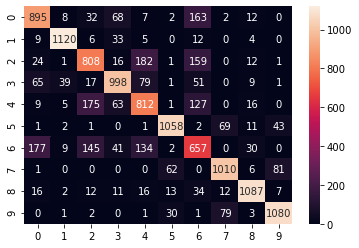

In [40]:
confmat8 = confusion_matrix(y_test, y_pred8)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep8 = classification_report(y_test, y_pred8)
acc_score8 = accuracy_score(y_test, y_pred8)
print(class_rep8)
print("Accuracy: ", acc_score8)

              precision    recall  f1-score   support

           0       0.65      0.34      0.45      1189
           1       0.64      0.05      0.10      1189
           2       0.37      0.77      0.50      1204
           3       0.35      0.89      0.50      1260
           4       0.50      0.08      0.14      1208
           5       0.49      0.86      0.63      1188
           6       0.31      0.12      0.17      1195
           7       0.51      0.19      0.28      1160
           8       0.78      0.84      0.81      1210
           9       0.89      0.76      0.82      1197

    accuracy                           0.50     12000
   macro avg       0.55      0.49      0.44     12000
weighted avg       0.55      0.50      0.44     12000

Accuracy:  0.4955


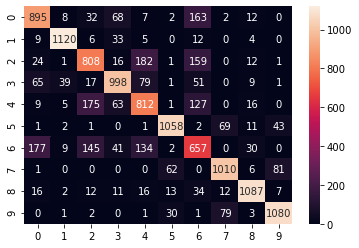

In [41]:
confmat9 = confusion_matrix(y_test, y_pred9)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep9 = classification_report(y_test, y_pred9)
acc_score9 = accuracy_score(y_test, y_pred9)
print(class_rep9)
print("Accuracy: ", acc_score9)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1189
           1       0.99      0.96      0.98      1189
           2       0.81      0.83      0.82      1204
           3       0.89      0.90      0.89      1260
           4       0.81      0.83      0.82      1208
           5       0.96      0.95      0.95      1188
           6       0.71      0.64      0.67      1195
           7       0.93      0.94      0.93      1160
           8       0.96      0.95      0.96      1210
           9       0.94      0.96      0.95      1197

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Accuracy:  0.8811666666666667


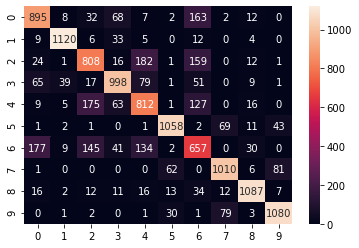

In [42]:
confmat10 = confusion_matrix(y_test, y_pred10)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep10 = classification_report(y_test, y_pred10)
acc_score10 = accuracy_score(y_test, y_pred10)
print(class_rep10)
print("Accuracy: ", acc_score10)

### The best accuracy I got is 89.6% using XGBoost.